In [7]:
import matplotlib.pylab as plt
import os
os.chdir('D:/git/forecast_template/forecast/recommend/rec') 

In [84]:
tr_queries = pd.read_csv('../data/data_set_phase1/train_queries.csv')
# 94358 sid 唯一;30878 pid 为null ;1787个sid没有te_plans
te_queries = pd.read_csv('../data/data_set_phase1/test_queries.csv')
# 491054 sid 唯一; 无缺失值
# sid plan_time plans([1, 2, 3, 4, 5, 6, 7]) 有1-7个plan
# plan 格式{distance eta price transport_mode:[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}
tr_plans = pd.read_csv('../data/data_set_phase1/train_plans.csv')
# 92571 sid 唯一; 无缺失值
te_plans = pd.read_csv('../data/data_set_phase1/test_plans.csv')
# 453336 sid 唯一; 无缺失值
# sid click_time click_mode：[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tr_click = pd.read_csv('../data/data_set_phase1/train_clicks.csv')
# 训练数据
tr_data = tr_queries.merge(tr_click, on='sid', how='left')
tr_data = tr_data.merge(tr_plans, on='sid', how='inner')
# click_time无用
tr_data = tr_data.drop(['click_time'], axis=1)
# 训练数据：click_mode 置0
tr_data['click_mode'] = tr_data['click_mode'].fillna(0)
# 测试数据
te_data = te_queries.merge(te_plans, on='sid', how='inner')
# 测试数据：click_mode 置-1
te_data['click_mode'] = -1

data = pd.concat([tr_data, te_data], axis=0)
# data = data.drop(['plan_time'], axis=1)
data = data.reset_index(drop=True)
data['pid'] = data['pid'].fillna(-1)
print('total data size: {}'.format(data.shape))
print('raw data columns: {}'.format(', '.join(data.columns)))

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



total data size: (583625, 8)
raw data columns: click_mode, d, o, pid, plan_time, plans, req_time, sid


In [10]:
feature_all_df =pd.read_csv('../data/features/features_all_ts.csv')

In [105]:
feature_all_df=pd.merge(feature_all_df,data[['sid','dis_cat']],on=['sid'])

In [106]:
feature_all_df.to_csv('../data/features/features_all_ts.csv',index=False)

In [107]:
feature_all_df.columns.values

array(['click_mode', 'd', 'o', 'pid', 'plan_time', 'sid', 'is_rain',
       'is_rain_max_mode', 'mode_feas_0', 'mode_feas_1', 'mode_feas_2',
       'mode_feas_3', 'mode_feas_4', 'mode_feas_5', 'mode_feas_6',
       'mode_feas_7', 'mode_feas_8', 'mode_feas_9', 'mode_feas_10',
       'mode_feas_11', 'first_mode', 'max_dist', 'min_dist', 'mean_dist',
       'std_dist', 'max_price', 'min_price', 'mean_price', 'std_price',
       'max_eta', 'min_eta', 'mean_eta', 'std_eta', 'max_dj', 'min_dj',
       'mean_dj', 'std_dj', 'max_sd', 'min_sd', 'mean_sd', 'std_sd',
       'max_sd_dj', 'min_sd_dj', 'mean_sd_dj', 'std_sd_dj',
       'max_dist_mode', 'min_dist_mode', 'max_price_mode',
       'min_price_mode', 'max_eta_mode', 'min_eta_mode', 'svd_mode_0',
       'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8',
       'svd_mode_9', 'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3',
       'svd_fea_4', 'svd_fea_5', 'svd_fea_6', 's

In [85]:
data=pd.merge(data,feature_all_df[['sid','o1','o2','d1','d2','num_direct_distance','hour','weekday']],on=['sid'])

In [86]:
time_click=data.groupby('hour')['click_mode'].apply(lambda x:x.value_counts()).reset_index()

In [87]:
time_click.columns =['hour','click_mode','mode_num']

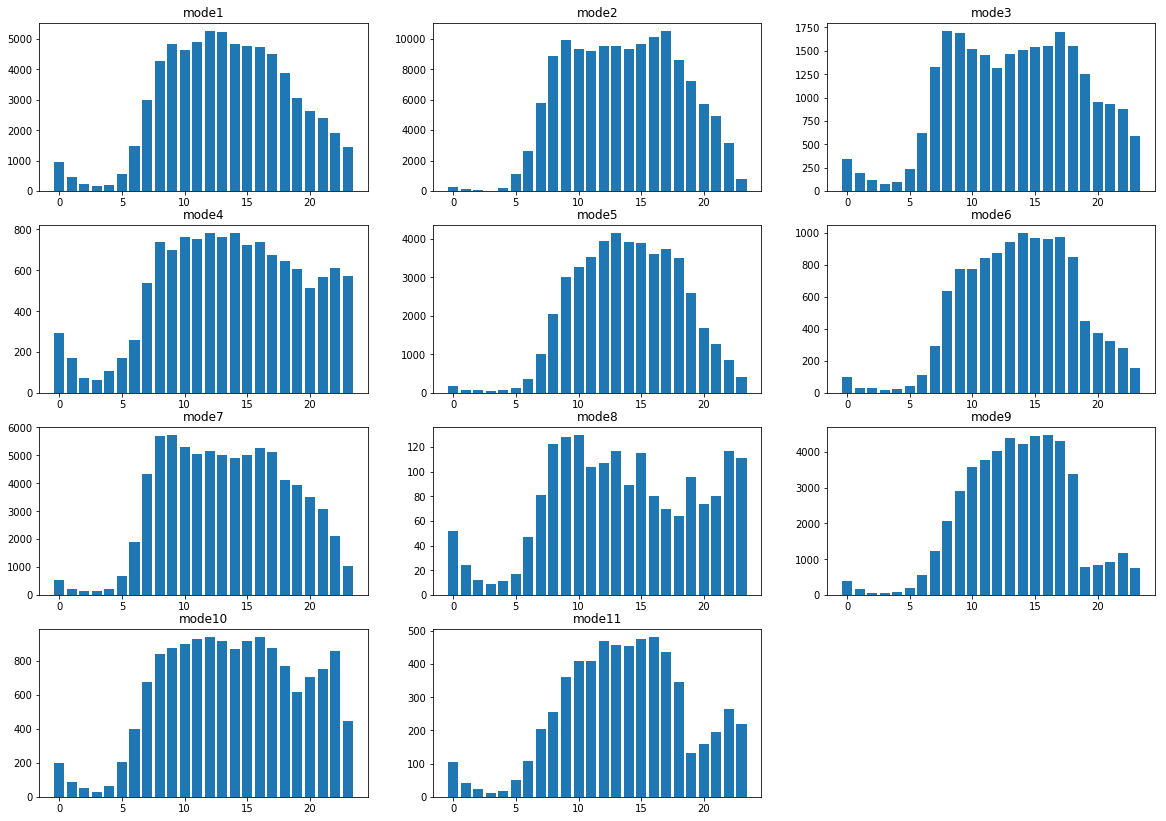

In [98]:
time_click=time_click.loc[time_click['click_mode']!=-1]

def get_num_by_mode(num):
    m=time_click[time_click['click_mode']==num]
    x=m.hour
    y=m.mode_num
    return x,y

def get_num_by_hour(h):
    m=time_click[time_click['hour']==h]
    x=m.click_mode
    y=m.mode_num
    return x,y

fig1=plt.figure(figsize=(20,10))
plt.subplots_adjust(top=1.2)

for i in range(11):
    mode_num=i+1
    ax=fig1.add_subplot(4,3,mode_num)
    ax.set_title('mode{}'.format(mode_num))
    x,y=get_num_by_mode(mode_num)
    ax.bar(x,y)
    mode_num+=1





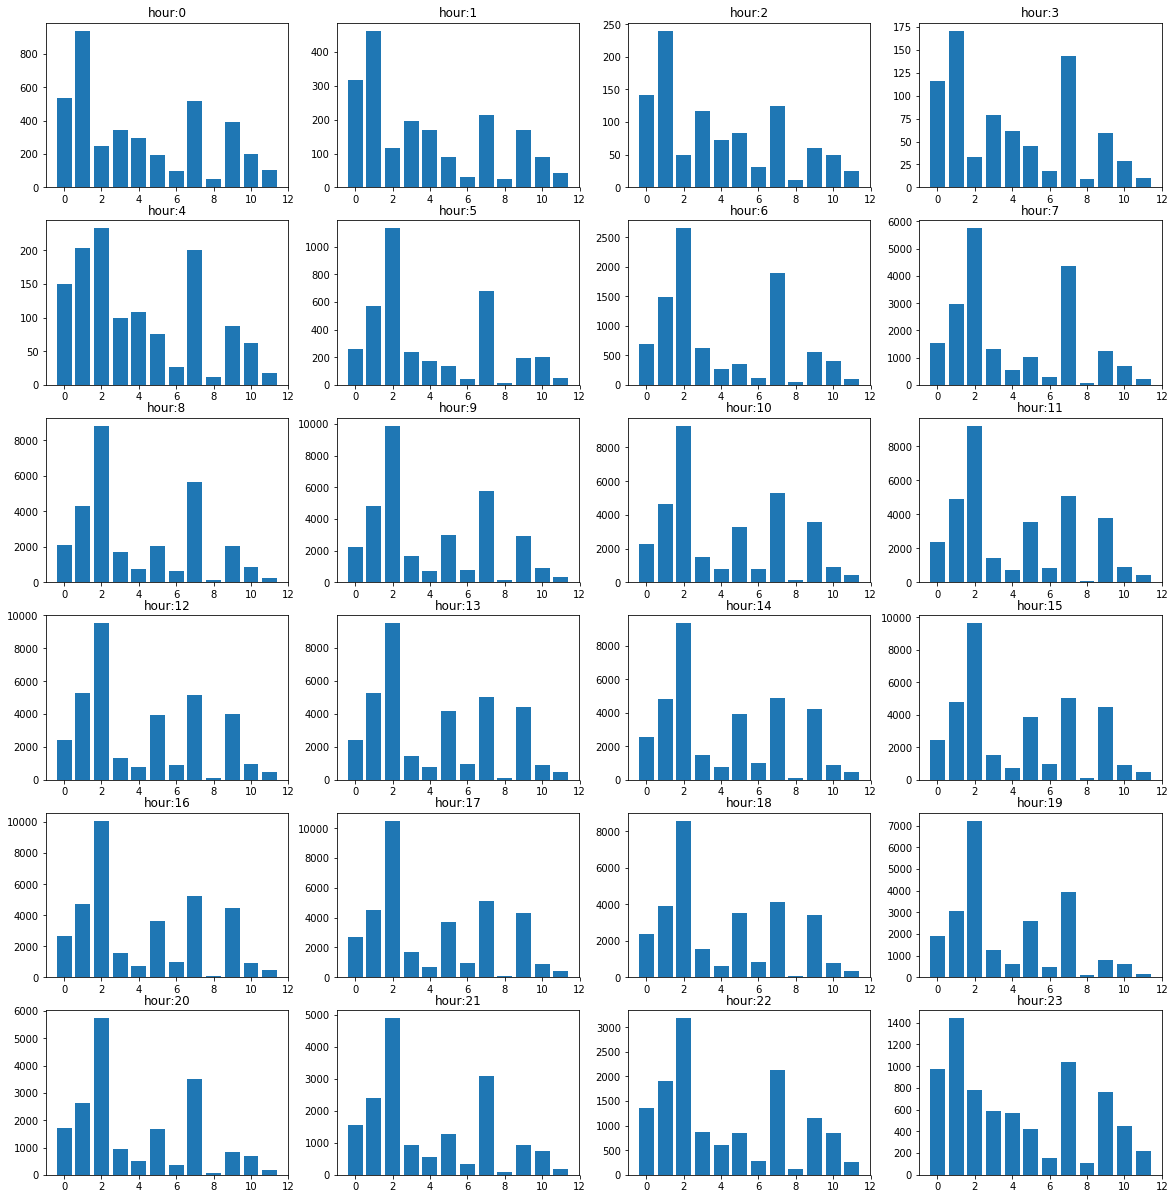

In [99]:
fig2=plt.figure(figsize=(20,10))
plt.subplots_adjust(top=1.5,bottom=-0.1)

for j in range(24):
    ax=fig2.add_subplot(6,4,j+1)
    ax.set_title('hour:{}'.format(j))
    x,y=get_num_by_hour(j)
    ax.bar(x,y)



In [ ]:
1-4  5-6  7-9 10-17  18-19   20-21 22-24

In [109]:
def convert_hour(h):
    p =0
    if h  >=1 and h<=4:
        p=0
    elif h>=5 and h<=6:
        p=1
    elif h>=7 and h<=10:
        p=2
    elif h>=11 and h<=17:
        p=3
    elif h>=18 and h<=19:
        p=4
    elif h>=20 and h<=21:
        p=5
    else: 
        p=6
    return p

def convert_hour1(h):
    p =0
    if h  >=1 and h<=4:
        p=0
    elif h>=5 and h<=6:
        p=1
    elif (h>=7 and h<=19):
        p=2
    elif h>=20 and h<=21:
        p=3
    else: 
        p=4
    return p
    
    
def get_mode_num(num):
    m=time_click[time_click['click_mode']==num]
    x=m.p
    y=m.mode_num
    return x,y        

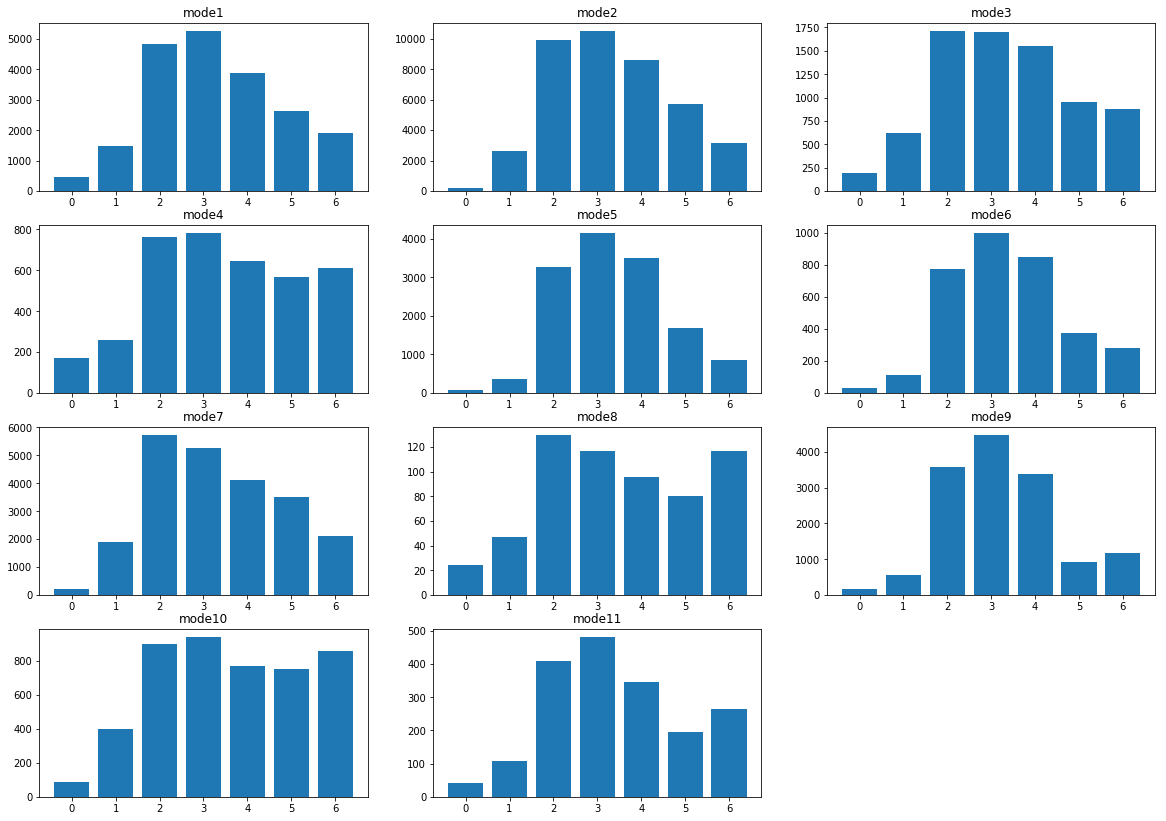

In [103]:
def get_num_by_mode_p(num):
    m=time_click[time_click['click_mode']==num]
    x=m.p
    y=m.mode_num
    return x,y

def get_num_by_p(p):
    m=time_click[time_click['p']==p]
    x=m.click_mode
    y=m.mode_num
    return x,y

def get_num_by_p1(p):
    m=time_click[time_click['p1']==p]
    x=m.click_mode
    y=m.mode_num
    return x,y

fig3=plt.figure(figsize=(20,10))
plt.subplots_adjust(top=1.2)

for i in range(11):
    mode_num=i+1
    ax=fig3.add_subplot(4,3,mode_num)
    ax.set_title('mode{}'.format(mode_num))
    x,y=get_num_by_mode_p(mode_num)
    ax.bar(x,y)
    mode_num+=1


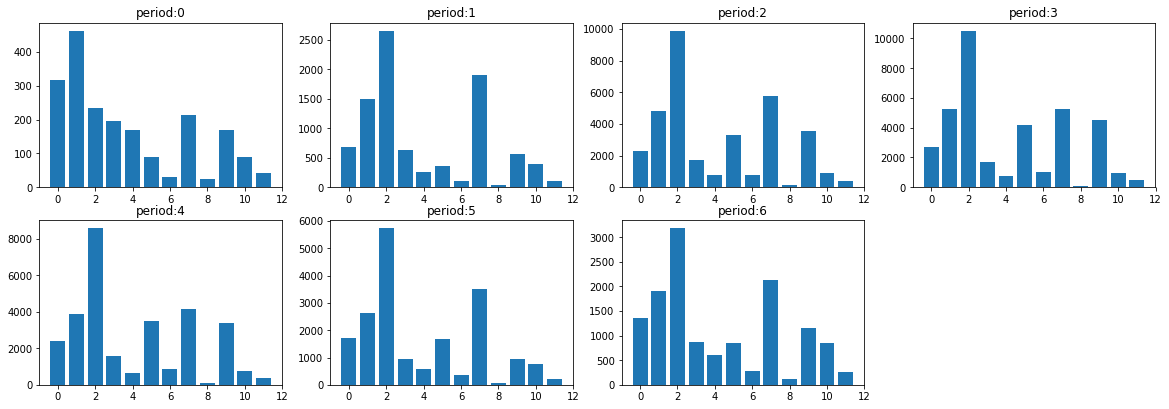

In [101]:
fig4=plt.figure(figsize=(20,10))
plt.subplots_adjust(top=1.5,bottom=-0.1)

for j in range(7):
    ax=fig4.add_subplot(6,4,j+1)
    ax.set_title('period:{}'.format(j))
    x,y=get_num_by_p(j)
    ax.bar(x,y)


In [ ]:
1-4  5-6  7-9 10-17  18-19   20-21 22-24

In [110]:
time_click['p1']=time_click['hour'].apply(lambda x:convert_hour1(x))

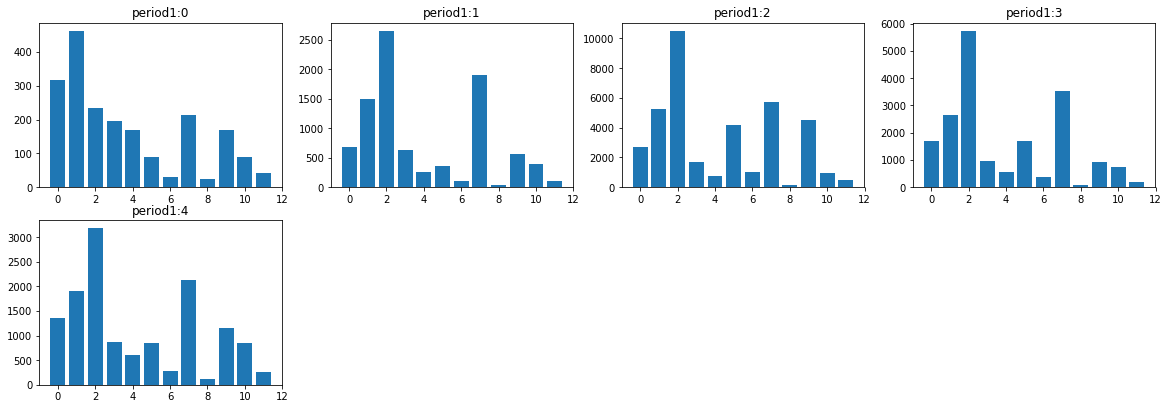

In [111]:
fig5=plt.figure(figsize=(20,10))
plt.subplots_adjust(top=1.5,bottom=-0.1)

for j in range(5):
    ax=fig5.add_subplot(6,4,j+1)
    ax.set_title('period1:{}'.format(j))
    x,y=get_num_by_p1(j)
    ax.bar(x,y)

In [2]:
#data = add_od_feas(data)

In [13]:
data.head()

,click_mode,d,o,pid,plan_time,plans,req_time,sid,o1,o2,d1,d2,num_direct_distance
0,9.0,"116.32,39.96","116.29,39.97",-1.0,2018-11-02 17:54:30,"[{""distance"": 5219, ""price"": 300, ""eta"": 1367,...",2018-11-02 17:54:30,3000821,116.29,39.97,116.32,39.96,2793.287376
1,1.0,"116.33,39.79","116.39,39.84",210736.0,2018-11-16 10:53:10,"[{""distance"": 13864, ""price"": 600, ""eta"": 3221...",2018-11-16 10:53:10,3085857,116.39,39.84,116.33,39.79,7563.924113
2,9.0,"116.27,40.00","116.31,39.93",-1.0,2018-10-06 10:33:58,"[{""distance"": 12294, ""price"": 400, ""eta"": 2472...",2018-10-06 10:33:58,2944522,116.31,39.93,116.27,40.00,8490.531926
3,1.0,"116.39,39.90","116.27,39.88",202427.0,2018-11-23 14:54:11,"[{""distance"": 14853, ""price"": 1700, ""eta"": 291...",2018-11-23 14:54:11,559931,116.27,39.88,116.39,39.90,10501.168219
4,7.0,"116.37,39.86","116.34,39.96",172251.0,2018-10-30 11:48:41,"[{""distance"": 12882, ""price"": 600, ""eta"": 3211...",2018-10-30 11:48:41,2819352,116.34,39.96,116.37,39.86,11395.752658


In [91]:
k=5
dis=data['num_direct_distance']
p = np.array([100*i/k for i in range(k+1)])

w=np.percentile(dis,p)

w[0] = w[0]*(1-1e-10)

d2 = pd.cut(dis, w, labels = range(k))
time_click['dis_cat']=d2
time_click.loc[time_click['dis_cat'].isnull(),'dis_cat']=0


In [103]:
def get_num_by_dis(dis_cat):
    d=data[data['dis_cat']==dis_cat]
    m=d.click_mode.value_counts()
    x=m.index
    y=m.values
    return x,y

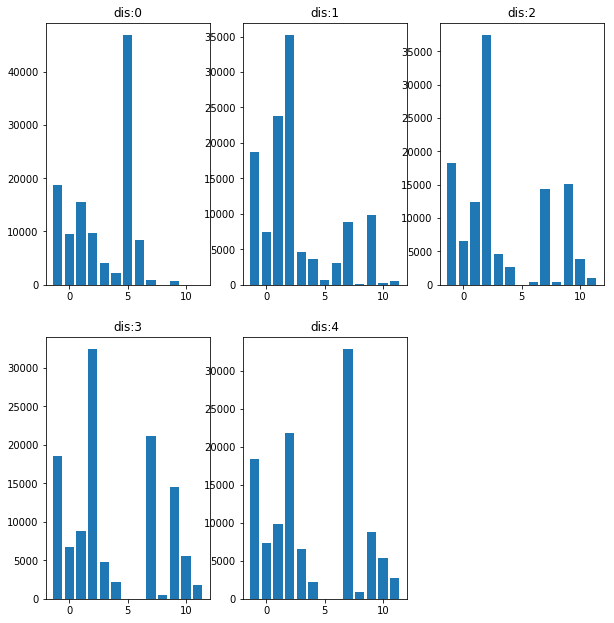

In [104]:
fig6=plt.figure(figsize=(10,5))
plt.subplots_adjust(top=1.5,bottom=-0.1)

for j in range(5):
    ax=fig6.add_subplot(2,3,j+1)
    ax.set_title('dis:{}'.format(j))
    x,y=get_num_by_dis(j)
    ax.bar(x,y)

In [88]:
time_click.loc[time_click['dis_cat']<100]


,hour,click_mode,mode_num
0,0,1.0,940
1,0,-1.0,784
2,0,0.0,534
3,0,7.0,521
4,0,9.0,393
5,0,3.0,345
6,0,4.0,294
7,0,2.0,249
8,0,10.0,199
9,0,5.0,192


In [137]:
data = merge_raw_data()
plans_df = gen_plan_df(data)
plans_df.to_csv('../data/data_set_phase1/plans_djsd.csv',index=False)



SyntaxError: invalid syntax (<ipython-input-137-1cee57d58b32>, line 3)

In [129]:
plans_features = gen_plan_feas(data)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


mode tfidf...


In [131]:
plans_features.columns

Index(['first_mode', 'max_dist', 'max_dist_mode', 'max_dj', 'max_eta',
       'max_eta_mode', 'max_price', 'max_price_eta', 'max_price_eta_mode',
       'max_price_mode', 'max_sd', 'max_sd_dj', 'mean_dist', 'mean_dj',
       'mean_eta', 'mean_price', 'mean_price_eta', 'mean_sd', 'mean_sd_dj',
       'min_dist', 'min_dist_mode', 'min_dj', 'min_eta', 'min_eta_mode',
       'min_price', 'min_price_eta', 'min_price_eta_mode', 'min_price_mode',
       'min_sd', 'min_sd_dj', 'mode_feas_0', 'mode_feas_1', 'mode_feas_10',
       'mode_feas_11', 'mode_feas_2', 'mode_feas_3', 'mode_feas_4',
       'mode_feas_5', 'mode_feas_6', 'mode_feas_7', 'mode_feas_8',
       'mode_feas_9', 'mode_texts', 'sid', 'std_dist', 'std_dj', 'std_eta',
       'std_price', 'std_price_eta', 'std_sd', 'std_sd_dj', 'svd_mode_0',
       'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4', 'svd_mode_5',
       'svd_mode_6', 'svd_mode_7', 'svd_mode_8', 'svd_mode_9'],
      dtype='object')

In [146]:
data_empty = data[~data['sid'].isin(plans_df.sid.unique())]

In [184]:
plans_features = gen_plan_feas(data)

mode tfidf...


In [157]:
empty_plans_features.head()


,sid,mode_feas_0,mode_feas_1,mode_feas_2,mode_feas_3,mode_feas_4,mode_feas_5,mode_feas_6,mode_feas_7,mode_feas_8,...,mean_price_eta,std_price_eta,max_dist_mode,min_dist_mode,max_price_mode,min_price_mode,max_eta_mode,min_eta_mode,max_price_eta_mode,min_price_eta_mode


In [159]:
plans_features.columns

Index(['sid', 'mode_feas_0', 'mode_feas_1', 'mode_feas_2', 'mode_feas_3',
       'mode_feas_4', 'mode_feas_5', 'mode_feas_6', 'mode_feas_7',
       'mode_feas_8', 'mode_feas_9', 'mode_feas_10', 'mode_feas_11',
       'first_mode', 'second_mode', 'last_mode', 'mode_texts', 'max_dist',
       'min_dist', 'mean_dist', 'std_dist', 'max_price', 'min_price',
       'mean_price', 'std_price', 'max_eta', 'min_eta', 'mean_eta', 'std_eta',
       'max_dj', 'min_dj', 'mean_dj', 'std_dj', 'max_sd', 'min_sd', 'mean_sd',
       'std_sd', 'max_sd_dj', 'min_sd_dj', 'mean_sd_dj', 'std_sd_dj',
       'max_price_eta', 'min_price_eta', 'mean_price_eta', 'std_price_eta',
       'max_dist_mode', 'min_dist_mode', 'max_price_mode', 'min_price_mode',
       'max_eta_mode', 'min_eta_mode', 'max_price_eta_mode',
       'min_price_eta_mode', 'svd_mode_0', 'svd_mode_1', 'svd_mode_2',
       'svd_mode_3', 'svd_mode_4', 'svd_mode_5', 'svd_mode_6', 'svd_mode_7',
       'svd_mode_8', 'svd_mode_9'],
      dtype='object

In [167]:
plans_features.to_csv('../data/data_set_phase1/plans_features.csv',index=False)

In [166]:
plans_df.head()

,sid,plan_time,plan_pos,distance,eta,price,transport_mode,dj,sd,sd_dj,price_eta
0,3000821,2018-11-02 17:54:30,1,5219,1367,300.0,9,0.057482,3.817849,66.417852,410100.0
1,3000821,2018-11-02 17:54:30,2,4537,1035,0.0,3,0.000000,4.383575,1000.000000,NaN
2,3000821,2018-11-02 17:54:30,3,4537,1095,2100.0,4,0.462861,4.143379,8.951672,2299500.0
3,3000821,2018-11-02 17:54:30,4,4118,1243,0.0,6,0.000000,3.312953,1000.000000,NaN
4,3000821,2018-11-02 17:54:30,5,5219,1679,300.0,2,0.057482,3.108398,54.075761,503700.0


In [ ]:
feature_all_df

In [192]:
plans_columns =['sid','second_mode', 'last_mode_1', 'max_sd_mode', 'min_sd_mode',
       'max_dj_mode', 'min_dj_mode', 'max_sd_dj_mode', 'min_sd_dj_mode']

In [193]:
feature_all_df=pd.merge(feature_all_df,plans_features[plans_columns],on=['sid'],how='left')

In [188]:
plans_columns

['sid',
 'max_price_eta',
 'min_price_eta',
 'mean_price_eta',
 'std_price_eta',
 'max_price_eta_mode',
 'min_price_eta_mode']

In [173]:
feature_all_df =pd.read_csv('../data/features/features_all_ts.csv')

In [206]:
feature_all_df.to_csv('../data/features/features_all_ts.csv',index=False)

In [189]:
plans_features=plans_features.rename(columns={'last_mode':'last_mode_1'})

In [195]:
plans_features['is_week_end']

array(['click_mode', 'd', 'o', 'pid', 'plan_time', 'sid', 'is_rain',
       'is_rain_max_mode', 'mode_feas_0', 'mode_feas_1', 'mode_feas_2',
       'mode_feas_3', 'mode_feas_4', 'mode_feas_5', 'mode_feas_6',
       'mode_feas_7', 'mode_feas_8', 'mode_feas_9', 'mode_feas_10',
       'mode_feas_11', 'first_mode', 'max_dist', 'min_dist', 'mean_dist',
       'std_dist', 'max_price', 'min_price', 'mean_price', 'std_price',
       'max_eta', 'min_eta', 'mean_eta', 'std_eta', 'max_dj', 'min_dj',
       'mean_dj', 'std_dj', 'max_sd', 'min_sd', 'mean_sd', 'std_sd',
       'max_sd_dj', 'min_sd_dj', 'mean_sd_dj', 'std_sd_dj',
       'max_dist_mode', 'min_dist_mode', 'max_price_mode',
       'min_price_mode', 'max_eta_mode', 'min_eta_mode', 'svd_mode_0',
       'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8',
       'svd_mode_9', 'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3',
       'svd_fea_4', 'svd_fea_5', 'svd_fea_6', 's

In [204]:
feature_all_df['is_week_end']=feature_all_df['weekday'].apply(lambda x:1 if x in [5,6] else 0)

In [ ]:
 'second_mode', 'last_mode_1', 'max_sd_mode', 'min_sd_mode',
       'max_dj_mode', 'min_dj_mode', 'max_sd_dj_mode', 'min_sd_dj_mode',

Out[188]:
['sid',
 'max_price_eta',
 'min_price_eta',
 'mean_price_eta',
 'std_price_eta',
 'max_price_eta_mode',
 'min_price_eta_mode']

In [205]:
feature_all_df['is_week_end'].head()

0    0
1    0
2    1
3    0
4    0
Name: is_week_end, dtype: int64

In [208]:
pred_df =pd.read_csv('../submit/gbdt_ext_result_2019-05-19-12-18-48.csv')

In [209]:
pred_df['recommend_mode'].value_counts()

2     34115
7     22332
1     17874
5     10876
10     3494
0      2232
9      1820
3       645
11      391
6       384
8       154
4        41
Name: recommend_mode, dtype: int64

In [211]:
tr_data['click_mode'].value_counts()

2.0     136491
7.0      78209
1.0      70369
9.0      48864
5.0      47480
0.0      37718
3.0      24626
10.0     14882
4.0      12606
6.0      11863
11.0      6089
8.0       1857
Name: click_mode, dtype: int64

<BarContainer object of 12 artists>

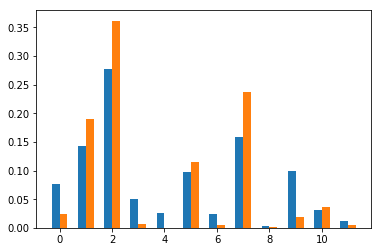

In [216]:
width = 0.3
c1 = tr_data['click_mode'].value_counts()
c2 = pred_df['recommend_mode'].value_counts()
x1, y1 = sort_count(c1)
x2, y2 = sort_count(c2)
y11 = y1 / sum(y1)
y22 = y2 / sum(y2)

plt.bar(x1 - width / 2, y11, width=0.3)
plt.bar(x2 + width / 2, y22, width=0.3)

In [215]:
def sort_count(c):
    d = dict(c)
    ds = [(k, d[k]) for k in sorted(d.keys())]
    x, y = zip(*ds)
    return np.array(x), np.array(y)

In [227]:
features_all2=pd.read_csv('../data/features/features_all_ts_p10_s20_zero.csv')

In [219]:
c1=feature_all_df.columns
c2=features_all2.columns

In [222]:
set(c2)-set(c1)

{'Unnamed: 0', 'dis_cat'}

In [224]:
diff_columns=['dis_cat_x',
 'dis_cat_y',
 'hour_p',
 'is_week_end',
 'last_mode_1',
 'max_dj_mode',
 'max_price_eta',
 'max_price_eta_mode',
 'max_sd_dj_mode',
 'max_sd_mode',
 'mean_price_eta',
 'min_dj_mode',
 'min_price_eta',
 'min_price_eta_mode',
 'min_sd_dj_mode',
 'min_sd_mode',
 'second_mode',
 'std_price_eta']

In [228]:
features_all2=pd.merge(features_all2,feature_all_df[['sid']+diff_columns],on=['sid'])

In [231]:
features_all2=features_all2.drop(['Unnamed: 0'],axis=1)

In [240]:
features_all2.to_csv('../data/features/features_all_ts_p10_s20_zero.csv',index=False)

In [235]:
profile_data=read_profile_data()

In [236]:
profile_data.head()

,pid,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65
0,196356.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204083.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,170667.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,115511.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,129719.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [237]:
features_all2=pd.merge(features_all2,profile_data,on=['pid'],how='left')

In [239]:
features_all2.columns.values

array(['click_mode', 'd', 'o', 'pid', 'plan_time', 'sid', 'is_rain',
       'is_rain_max_mode', 'mode_feas_0', 'mode_feas_1', 'mode_feas_2',
       'mode_feas_3', 'mode_feas_4', 'mode_feas_5', 'mode_feas_6',
       'mode_feas_7', 'mode_feas_8', 'mode_feas_9', 'mode_feas_10',
       'mode_feas_11', 'first_mode', 'max_dist', 'min_dist', 'mean_dist',
       'std_dist', 'max_price', 'min_price', 'mean_price', 'std_price',
       'max_eta', 'min_eta', 'mean_eta', 'std_eta', 'max_dj', 'min_dj',
       'mean_dj', 'std_dj', 'max_sd', 'min_sd', 'mean_sd', 'std_sd',
       'max_sd_dj', 'min_sd_dj', 'mean_sd_dj', 'std_sd_dj',
       'max_dist_mode', 'min_dist_mode', 'max_price_mode',
       'min_price_mode', 'max_eta_mode', 'min_eta_mode', 'svd_mode_0',
       'svd_mode_1', 'svd_mode_2', 'svd_mode_3', 'svd_mode_4',
       'svd_mode_5', 'svd_mode_6', 'svd_mode_7', 'svd_mode_8',
       'svd_mode_9', 'svd_fea_0', 'svd_fea_1', 'svd_fea_2', 'svd_fea_3',
       'svd_fea_4', 'svd_fea_5', 'svd_fea_6', 's

In [241]:
features_all2.columns

Index(['click_mode', 'd', 'o', 'pid', 'plan_time', 'sid', 'is_rain',
       'is_rain_max_mode', 'mode_feas_0', 'mode_feas_1',
       ...
       'p56', 'p57', 'p58', 'p59', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65'],
      dtype='object', length=228)